# Impeller Stress and Frequency Prediction

## Polynominal Linear Regression

<h2 style="color:cyan">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:cyan">Read Data</h2>

In [2]:
filename_train = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20stress%20and%20freq%20C.csv'
filename_test = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20test%20data%20C.csv'
# filename_eva = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20evaluation%20data.csv'

df = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)
# df_eva = pd.read_csv(filename_eva)

<h2 style="color:cyan">Data Exploring</h2>

In [3]:
df_test.head()

,No,Model,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,1,C,1785,7850,205,1950,730,12,9.0,9.0,9.0,0,271.71,415.07,678.23,542.75,28.388,17.349
1,2,C,1785,7850,205,1950,730,15,12.0,12.0,12.0,0,250.89,353.95,475.19,534.96,29.982,20.122
2,3,C,1785,7850,205,1950,730,18,12.0,15.0,12.0,0,204.84,349.98,459.77,475.26,32.272,23.368
3,4,C,1785,7850,205,1850,580,12,9.0,9.0,9.0,0,256.92,360.13,559.44,485.67,34.231,26.625
4,5,C,1785,7850,205,1850,580,15,12.0,12.0,12.0,0,237.59,319.91,392.15,482.29,36.130,29.283


In [4]:
print(df.shape)
print(df_test.shape)
#print(df_eva.shape)

(400, 18)
(54, 18)


In [5]:
df.describe()

,No,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
count,400.000000,400.0,400.0,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,1785.0,7850.0,205.0,1312.500000,440.000000,9.258000,6.467000,3.601000,7.693000,0.0,272.35965,351.096887,533.654745,131.860173,47.988750,42.311905
std,115.614301,0.0,0.0,0.0,381.881308,176.260231,3.598146,2.990806,4.340114,4.182114,0.0,248.93674,239.976914,308.554096,163.629261,10.586843,12.195241
min,1.000000,1785.0,7850.0,205.0,600.000000,120.000000,3.200000,3.200000,0.000000,3.200000,0.0,18.14300,27.758000,71.721000,0.000000,25.744000,14.634000
25%,100.750000,1785.0,7850.0,205.0,1075.000000,317.500000,6.000000,4.500000,0.000000,4.500000,0.0,98.53400,170.482500,259.830000,0.000000,41.107250,34.841750
50%,200.500000,1785.0,7850.0,205.0,1325.000000,480.000000,9.000000,6.000000,1.600000,6.000000,0.0,182.87500,290.240000,468.315000,18.107500,47.406500,42.308500
75%,300.250000,1785.0,7850.0,205.0,1562.500000,580.000000,12.000000,9.000000,6.000000,9.000000,0.0,346.10250,502.805000,805.785000,249.897500,54.268000,50.017250
max,400.000000,1785.0,7850.0,205.0,2000.000000,730.000000,21.000000,18.000000,15.000000,21.000000,0.0,1182.60000,1116.400000,1211.200000,654.450000,87.950000,84.680000


<h2 style="color:cyan">Drop unused column</h2>

In [6]:
df.drop(['No', 'Model'], axis=1, inplace=True)
df_test.drop(['No', 'Model'], axis=1, inplace=True)
#df_eva.drop(['No', 'Model', 'Vane max stress loc'], axis=1, inplace=True)

# fill NA with 0
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)
#df_eva.fillna(0, inplace=True)

In [7]:
df.head()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,1785,7850,205,600,120,4.5,3.2,0.0,3.2,0,52.200,78.900,172.90,0.0,63.98,59.68
1,1785,7850,205,600,120,6.0,3.2,0.0,3.2,0,35.522,78.314,164.81,0.0,76.88,73.37
2,1785,7850,205,600,120,3.2,3.2,0.0,3.2,0,84.316,80.568,180.62,0.0,49.91,44.11
3,1785,7850,205,600,120,4.5,4.5,0.0,3.2,0,52.559,52.561,171.35,0.0,61.34,57.22
4,1785,7850,205,600,120,4.5,6.0,0.0,3.2,0,52.555,42.276,170.64,0.0,58.33,54.29


<h2 style="color:cyan">Check correlation between columns</h2>

In [8]:
df.corr()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MatDensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MatYoung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,NaN,NaN,NaN,1.000000,0.978892,0.737836,0.767581,0.305970,0.771392,NaN,0.581527,0.632891,0.623426,0.379694,-0.662147,-0.634638
DB,NaN,NaN,NaN,0.978892,1.000000,0.716563,0.739319,0.293073,0.744678,NaN,0.568009,0.625901,0.609536,0.368481,-0.585602,-0.554012
tm,NaN,NaN,NaN,0.737836,0.716563,1.000000,0.595812,0.199763,0.604644,NaN,0.186549,0.489848,0.474176,0.258663,-0.240704,-0.236235
ts,NaN,NaN,NaN,0.767581,0.739319,0.595812,1.000000,0.133162,0.744893,NaN,0.560315,0.337172,0.500577,0.154204,-0.542830,-0.512037
ti,NaN,NaN,NaN,0.305970,0.293073,0.199763,0.133162,1.000000,-0.129135,NaN,-0.352586,-0.333777,-0.388715,0.850625,-0.266235,-0.268361
tv,NaN,NaN,NaN,0.771392,0.744678,0.604644,0.744893,-0.129135,1.000000,NaN,0.777818,0.740346,0.579177,-0.072378,-0.523752,-0.508613
Rib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Remove speed for impeller stress prediction data - speed effect will be estimated separately
df_clean = df.loc[df['Speed'] == 1785].loc[df['MatDensity'] == 7850].loc[df['MatYoung'] == 205]
df_clean_test = df_test.loc[df_test['Speed'] == 1785].loc[df_test['MatDensity'] == 7850].loc[df_test['MatYoung'] == 205]
#df_clean_eva = df_eva.loc[df_eva['Speed'] == 1785].loc[df_eva['MatDensity'] == 7850].loc[df_eva['MatYoung'] == 205].loc[df_eva['hasMouthRing'] == 0].loc[df_eva['isStraightSide'] == 0].loc[df_eva['hasRimout'] == 0].loc[df_eva['hasRimIn'] == 0].loc[df_eva['hasVaneRimOut'] == 0]

df_clean.drop(['Speed', 'MatDensity', 'MatYoung'], axis=1, inplace=True)  # can drop Rib if not airfoil
df_clean_test.drop(['Speed', 'MatDensity', 'MatYoung'], axis=1, inplace=True)
#df_clean_eva.drop(['Speed', 'MatDensity', 'MatYoung', 'ti', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)

# Scale D2 and DB
df_clean['D2'] = df_clean['D2'] / 1000
df_clean['DB'] = df_clean['DB'] / 1000
df_clean_test['D2'] = df_clean_test['D2'] / 1000
df_clean_test['DB'] = df_clean_test['DB'] / 1000
#df_clean_eva['D2'] = df_clean_eva['D2'] / 1000
#df_clean_eva['DB'] = df_clean_eva['DB'] / 1000

# stress dataframe
df_stress = df_clean.loc[df_clean['Sm'] != 0].loc[df_clean['Ss'] != 0].loc[df_clean['Sv'] != 0].loc[df_clean['Si'] == 0]
df_stress_mid = df_clean.loc[df_clean['Sm'] != 0].loc[df_clean['Ss'] != 0].loc[df_clean['Sv'] != 0].loc[df_clean['Si'] != 0]  # with middle plate
df_stress_test = df_clean_test.loc[df_clean_test['Sm'] != 0].loc[df_clean_test['Ss'] != 0].loc[df_clean_test['Sv'] != 0].loc[df_clean_test['Si'] == 0]
df_stress_mid_test = df_clean_test.loc[df_clean_test['Sm'] != 0].loc[df_clean_test['Ss'] != 0].loc[df_clean_test['Sv'] != 0].loc[df_clean_test['Si'] != 0] # with middle plate
#df_stress_eva = df_clean_eva.loc[df_clean_eva['Sm'] != 0].loc[df_clean_eva['Ss'] != 0].loc[df_clean_eva['Sv'] != 0]

# frequency dataframe
df_frequency = df_clean.loc[df_clean['Frequency'] != 0].loc[df_clean['Frequency0'] != 0]
df_frequency_test = df_clean_test.loc[df_clean_test['Frequency'] != 0].loc[df_clean_test['Frequency0'] != 0]
#df_frequency_eva = df_clean_eva.loc[df_clean_eva['Rib'] == 2].loc[df_clean_eva['Frequency'] != 0].loc[df_clean_eva['Frequency0'] != 0]

print(df_stress.shape)
print(df_stress_mid.shape)
print(df_stress_test.shape)
print(df_stress_mid_test.shape)
#print(df_stress_eva.shape)


(200, 13)
(200, 13)
(24, 13)
(30, 13)


In [11]:
df_stress.head()

,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,0.6,0.12,4.5,3.2,0.0,3.2,0,52.200,78.900,172.90,0.0,63.98,59.68
1,0.6,0.12,6.0,3.2,0.0,3.2,0,35.522,78.314,164.81,0.0,76.88,73.37
2,0.6,0.12,3.2,3.2,0.0,3.2,0,84.316,80.568,180.62,0.0,49.91,44.11
3,0.6,0.12,4.5,4.5,0.0,3.2,0,52.559,52.561,171.35,0.0,61.34,57.22
4,0.6,0.12,4.5,6.0,0.0,3.2,0,52.555,42.276,170.64,0.0,58.33,54.29


In [12]:
df_frequency.head()

,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,0.6,0.12,4.5,3.2,0.0,3.2,0,52.200,78.900,172.90,0.0,63.98,59.68
1,0.6,0.12,6.0,3.2,0.0,3.2,0,35.522,78.314,164.81,0.0,76.88,73.37
2,0.6,0.12,3.2,3.2,0.0,3.2,0,84.316,80.568,180.62,0.0,49.91,44.11
3,0.6,0.12,4.5,4.5,0.0,3.2,0,52.559,52.561,171.35,0.0,61.34,57.22
4,0.6,0.12,4.5,6.0,0.0,3.2,0,52.555,42.276,170.64,0.0,58.33,54.29


In [12]:
df_stress_test.head()

,D2,DB,tm,ts,ti,tv,Rib,Sm,Ss,Sv,Si,Frequency,Frequency0
0,1.95,0.73,12,9.0,9.0,9.0,0,271.71,415.07,678.23,542.75,28.388,17.349
1,1.95,0.73,15,12.0,12.0,12.0,0,250.89,353.95,475.19,534.96,29.982,20.122
2,1.95,0.73,18,12.0,15.0,12.0,0,204.84,349.98,459.77,475.26,32.272,23.368
3,1.85,0.58,12,9.0,9.0,9.0,0,256.92,360.13,559.44,485.67,34.231,26.625
4,1.85,0.58,15,12.0,12.0,12.0,0,237.59,319.91,392.15,482.29,36.130,29.283


<h2 style="color:cyan">Data exploratory analysis</h2>

In [13]:
# Input parameters for stress
x_train_stress = df_stress[['D2','tm','ts','tv', 'ti']]  # Rib or ti
x_train_mid_stress = df_stress_mid[['D2','tm','ts','tv', 'ti']]
x_test_stress = df_stress_test[['D2','tm','ts','tv', 'ti']]  # Rib or ti
x_test_mid_stress = df_stress_mid_test[['D2','tm','ts','tv', 'ti']]
#x_eva_stress =  df_stress_eva[['D2','DB','tm','ts','tv','Rib']]

x_train_stress.head()

,D2,tm,ts,tv,ti
0,0.6,4.5,3.2,3.2,0.0
1,0.6,6.0,3.2,3.2,0.0
2,0.6,3.2,3.2,3.2,0.0
3,0.6,4.5,4.5,3.2,0.0
4,0.6,4.5,6.0,3.2,0.0


In [14]:
# Input parameters for frequency
x_train_frequency = df_frequency[['D2','tm','ts','tv','DB','ti']]
x_test_frequency = df_frequency_test[['D2','tm','ts','tv', 'DB','ti']]
#x_eva_frequency = df_frequency_eva[['D2','tm','ts','tv', 'DB']]

x_test_frequency.head()

,D2,tm,ts,tv,DB,ti
0,1.95,12,9.0,9.0,0.73,9.0
1,1.95,15,12.0,12.0,0.73,12.0
2,1.95,18,12.0,12.0,0.73,15.0
3,1.85,12,9.0,9.0,0.58,9.0
4,1.85,15,12.0,12.0,0.58,12.0


In [15]:
# Output parameters for stress
ym_train_stress = df_stress[['Sm','Ss','Sv','Si']]   # can add Si
ym_train_mid_stress = df_stress_mid[['Sm','Ss','Sv','Si']]
ym_test_stress = df_stress_test[['Sm','Ss','Sv','Si']]
ym_test_mid_stress = df_stress_mid_test[['Sm','Ss','Sv','Si']]
#ym_eva_stress = df_stress_eva[['Sm','Ss','Sv','Si']]
ym_test_stress.head()
#ym_train_stress.head()

,Sm,Ss,Sv,Si
18,377.15,862.75,1383.80,0.0
19,475.52,607.49,1005.00,0.0
20,356.38,812.07,738.02,0.0
24,317.02,729.25,1114.90,0.0
25,397.30,504.47,791.34,0.0


In [16]:
# Output parameters for frequency
ym_train_frequency = df_frequency[['Frequency','Frequency0']]
ym_test_frequency = df_frequency_test[['Frequency','Frequency0']]
#ym_eva_frequency = df_frequency_eva[['Frequency','Frequency0']]
ym_train_frequency.head()

,Frequency,Frequency0
0,63.98,59.68
1,76.88,73.37
2,49.91,44.11
3,61.34,57.22
4,58.33,54.29


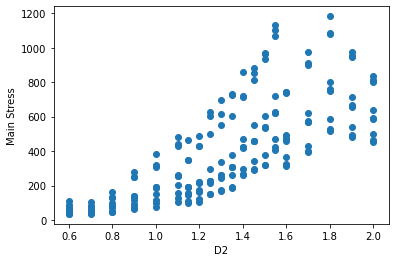

In [17]:
# plot main stress Vs impeller D2
plt.scatter(x_train_stress.D2, ym_train_stress.Sm)
plt.xlabel('D2')
plt.ylabel('Main Stress')
plt.show()

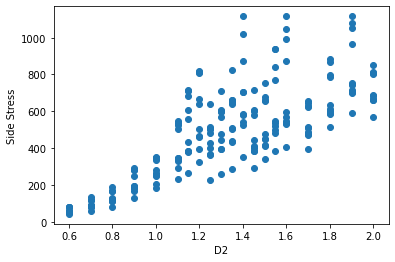

In [18]:
# plot side stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Ss)
plt.xlabel('D2')
plt.ylabel('Side Stress')
plt.show()

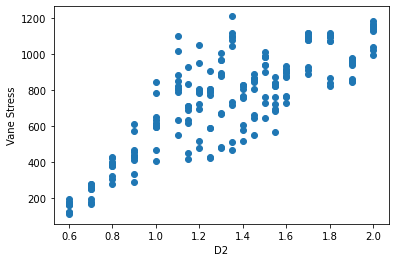

In [19]:
# plot vane stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sv)
plt.xlabel('D2')
plt.ylabel('Vane Stress')
plt.show()

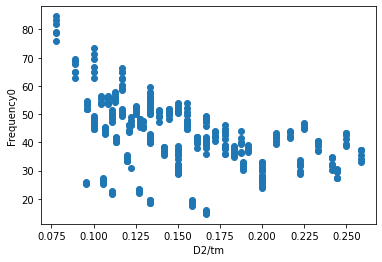

In [20]:
# plot frequency Vs D2/tm
plt.scatter(x_train_frequency.D2/x_train_frequency.tm,ym_train_frequency.Frequency0)
plt.xlabel('D2/tm')
plt.ylabel('Frequency0')
plt.show()

<h2 style="color:cyan">Function for Polynominal Regression</h2>

In [21]:
df_coef = pd.DataFrame()  # To save coefficients of fitting function

def polyEstimate(x_train_sm, y_train_sm, x_test_sm, y_test_sm, order=2 ,output=1, print_test = 0): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_train_sm)
    x_train_sm_transform.shape  # 1, x, y, x2, xy, y2
    x_test_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_test_sm)

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of train data
    yhat_sm = poly.predict(x_train_sm_transform)
    yhat_test_sm = poly.predict(x_test_sm_transform)

    # Plot predict and true data
    df_result = pd.DataFrame(list(zip(y_train_sm,yhat_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig = px.scatter(df_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Train data')
        fig.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig.show()

    # Plot predict and true data
    df_test_result = pd.DataFrame(list(zip(y_test_sm,yhat_test_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig2 = px.scatter(df_test_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Test data')
        fig2.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig2.show()

    if (print_test==1):
        print(df_test_result)

    # Model Evaluation
    if (output==1):
        print("Residual sum of squares for train (MSE): %.2f" % np.mean((y_train_sm - yhat_sm) ** 2))
        print("R2-score for train: %.2f" % r2_score(y_train_sm , yhat_sm))

        print("Residual sum of squares for test (MSE): %.2f" % np.mean((y_test_sm - yhat_test_sm) ** 2))
        print("R2-score for test: %.2f" % r2_score(y_test_sm , yhat_test_sm))

        # Extract the coefficient
        columns_name = (PolynomialFeatures(degree=order).fit(x_train_sm).get_feature_names(x_train_sm.columns))
        columns_name = columns_name[1:]
        columns_name.append("Intercept")

        data = poly.coef_[1:]
        data = np.append(data, poly.intercept_).reshape(1,data.shape[0]+1)

        df_coef = pd.DataFrame(data, columns=columns_name)
        df_coef.to_clipboard()
        print('Coefficent shape:', df_coef.shape)
        return yhat_sm, yhat_test_sm
    else:
        return r2_score(y_train_sm, yhat_sm), r2_score(y_test_sm, yhat_test_sm)     

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Main Stress</h2>

In [22]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sm, x_test_stress, ym_test_stress.Sm, print_test=1)

    True_Value  Predict_Value
0      377.150     444.905142
1      475.520     516.063104
2      356.380     350.597010
3      317.020     345.167948
4      397.300     410.896363
5      290.380     291.281668
6      239.480     261.269031
7      190.570     189.706664
8      192.840     194.123958
9      196.040     192.500312
10     151.670     158.178350
11     157.130     162.874938
12     233.000     248.325549
13     143.290     130.405173
14     171.080     175.600325
15     175.500     176.272236
16     104.480      97.980660
17     126.940     137.466971
18     102.040      94.157610
19      65.490      60.178147
20      75.389      81.394425
21      70.076      56.254684
22      85.701      77.944610
23      51.916      80.646467
Residual sum of squares for train (MSE): 358.98
R2-score for train: 1.00
Residual sum of squares for test (MSE): 399.54
R2-score for test: 0.97
Coefficent shape: (1, 21)


(array([  51.85627883,   29.09706572,   97.98208272,   48.15981387,
          41.91890495,   74.8547237 ,   26.33593719,   47.43932804,
          93.47499285,  120.70745394,   43.24257487,   53.39934563,
          87.12237069,   40.23939183,   34.7984236 ,   65.43142009,
          52.26683547,   69.27719618,   83.18385122,  110.04450339,
          73.22636198,   41.14196731,  138.22674051,   69.98112443,
          64.26086253,   97.88903804,   39.76740264,   59.25159419,
         134.04616653,  163.38064954,  146.18493395,   65.29251289,
         235.58932569,  144.08601835,  139.68843562,  119.04842705,
          87.70775738,   43.10624778,  266.56428178,  232.55507365,
         210.31910782,   87.18552133,  320.84408227,  207.97813771,
         203.30126131,  180.70877007,  112.21313151,   62.28337087,
         354.43140405,  317.56777572,  290.29155965,  124.91680774,
         421.9371168 ,  287.70853503,  282.75236496,  258.20739106,
         152.5567836 ,   97.29877193,  458.13680

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Side stress</h2>

In [23]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Ss, x_test_stress, ym_test_stress.Ss, print_test=1)

    True_Value  Predict_Value
0       862.75     836.642597
1       607.49     680.728199
2       812.07     796.206426
3       729.25     699.296620
4       504.47     562.427355
5       352.10     358.057956
6       547.14     574.622862
7       753.32     702.390073
8       434.71     479.297653
9       829.08     662.263525
10      586.63     581.573948
11      336.21     385.761758
12      451.15     446.667590
13      280.48     340.439710
14      390.52     405.969288
15      330.63     344.232717
16      214.33     256.950666
17      298.69     314.245146
18      210.67     227.855171
19      152.05     153.288715
20      157.84     186.133841
21      147.59     154.333280
22      108.08     100.349581
23      113.21     127.989236
Residual sum of squares for train (MSE): 1747.16
R2-score for train: 0.97
Residual sum of squares for test (MSE): 2239.72
R2-score for test: 0.96
Coefficent shape: (1, 21)


(array([  67.60803   ,   67.81085429,   69.16744377,   38.48160345,
          69.27780455,   80.50981991,   29.49354039,   43.93864178,
          48.00645293,   53.50695989,  122.32441649,  129.74502967,
         121.83184754,   60.36423613,   53.27533668,  143.58649575,
          49.40307461,   77.00021237,   69.06255454,   82.28445125,
         189.51019814,  197.51030065,  188.72788453,  103.90715133,
          69.53802135,  214.34081973,   93.52547913,  124.69115922,
         112.31572507,  129.10616412,  297.76736316,  315.93044902,
         291.90355788,  185.27301437,  119.87545902,  269.36819924,
         219.95822614,  150.32010309,  206.91718046,  188.60009644,
         393.86612604,  412.60870123,  387.7125761 ,  257.72891079,
         165.05112493,  361.89841979,  297.11116073,  219.78694651,
         283.20088107,  260.7662482 ,  502.63710838,  521.95917288,
         496.19381377,  342.85702667,  222.89901028,  467.10085978,
         386.93631478,  301.92600937,  372.15680

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Vane stress</h2>

In [24]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sv, x_test_stress, ym_test_stress.Sv, print_test=1)

    True_Value  Predict_Value
0      1383.80    1421.045273
1      1005.00     989.203120
2       738.02     697.765261
3      1114.90    1170.275494
4       791.34     788.220695
5       579.15     516.693922
6       854.94     943.098986
7       589.63     607.111854
8       584.60     584.211957
9       753.84     765.541598
10      441.88     448.524394
11      446.49     427.375977
12      715.04     714.326578
13      461.86     518.214739
14      323.47     315.807630
15      503.29     541.332411
16      350.56     367.716361
17      246.51     213.345127
18      490.42     507.348072
19      308.43     337.629286
20      246.09     240.811253
21      332.38     360.724900
22      230.38     244.690227
23      160.50     137.499417
Residual sum of squares for train (MSE): 1608.30
R2-score for train: 0.98
Residual sum of squares for test (MSE): 1151.63
R2-score for test: 0.99
Coefficent shape: (1, 21)


(array([ 196.9643426 ,  185.0275262 ,  202.01880627,  175.84038934,
         154.9375108 ,  130.82861575,  163.4181183 ,  102.4930949 ,
         181.31558037,  115.24222614,  296.26079135,  255.80486788,
         306.67755909,  273.13343485,  249.91893717,  212.067553  ,
         231.70660209,  155.48210157,  284.03565723,  199.53705358,
         431.08732726,  393.67150111,  439.98404633,  406.44202215,
         381.47604531,  326.07854304,  368.05528671,  271.01524032,
         415.82419587,  310.51004635,  463.68280383,  434.82314376,
         468.30143987,  439.97221919,  416.08476598,  589.50713392,
         301.31464808,  527.99724209,  326.70226605,  445.07630988,
         624.88033538,  599.06077263,  627.97892276,  599.65180214,
         574.01286976,  771.52021135,  440.0163908 ,  711.53246823,
         460.84386279,  603.23584416,  809.67113769,  786.89167226,
         811.2496764 ,  782.92465584,  755.53424431,  977.12655952,
         602.31140428,  918.66096513,  618.57873

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Middle plate - Main stress</h2>

In [27]:
# All parameters
polyEstimate(x_train_mid_stress, ym_train_mid_stress.Sm, x_test_mid_stress, ym_test_mid_stress.Sm, print_test=1)

    True_Value  Predict_Value
0      271.710     280.679306
1      250.890     257.816911
2      204.840     204.202476
3      256.920     246.810532
4      237.590     229.386752
5      191.720     181.851165
6      168.570     189.589567
7      169.120     164.886260
8      175.690     152.367370
9      155.780     167.621113
10     176.840     159.503711
11     179.560     148.101449
12     156.310     155.348080
13     140.780     133.894747
14     142.510     137.150286
15     132.480     146.587129
16     129.340     130.651183
17     131.180     127.341885
18     128.870     122.730701
19     117.150     113.549279
20     119.570     109.919865
21     105.030     101.800651
22      74.224      99.373755
23      81.759      95.424225
24      76.585      80.493960
25      81.404      64.577723
26      78.496      63.773908
27      65.337      61.089572
28      65.446      52.880972
29      65.337      51.124045
Residual sum of squares for train (MSE): 83.57
R2-score for train: 0.9

(array([ 22.49764858,  16.219447  ,  34.72068381,  22.25098698,
         24.05546656,  32.55905141,  11.90829119,  26.32893529,
         35.84492719,  52.82566057,  26.33941465,  38.24290874,
         34.82621588,  25.94249477,  26.92719672,  32.18976346,
         38.96355994,  32.30229617,  36.70482981,  45.99101626,
         37.60182563,  42.34627882,  50.08116225,  38.6364609 ,
         39.49381598,  43.95011292,  42.84642542,  37.63621153,
         52.56530145,  63.30253777,  57.60689852,  47.16194354,
         78.26184869,  61.71668396,  62.71784025,  51.79061568,
         53.29745252,  46.4153355 , 101.91922084,  83.95344756,
         74.39397625,  56.78998037,  99.04146181,  79.93531684,
         82.58826753,  68.9057848 ,  63.15244764,  59.39129359,
        126.42055805, 106.16461582,  94.10743305,  69.34439627,
        127.75057942,  98.66005496, 104.84714011,  92.09448188,
         74.17792777,  73.08595238, 152.13264978, 131.30216315,
         76.71899637,  85.70150592, 105.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Middle plate - Side stress</h2>

In [28]:
# All parameters
polyEstimate(x_train_mid_stress, ym_train_mid_stress.Ss, x_test_mid_stress, ym_test_mid_stress.Ss, print_test=1)

    True_Value  Predict_Value
0       415.07     415.855664
1       353.95     342.981421
2       349.98     351.684111
3       360.13     359.415063
4       319.91     305.760976
5       316.30     318.092548
6       573.94     521.069798
7       472.77     470.297339
8       310.43     319.678058
9       463.30     432.691269
10      353.02     348.242179
11      269.68     266.242867
12      553.55     460.650909
13      371.71     387.202406
14      294.92     295.724368
15      439.93     395.512566
16      332.21     322.088003
17      261.74     269.878185
18      375.78     331.810704
19      271.48     267.056635
20      224.01     222.642456
21      292.97     274.051024
22      221.05     217.967449
23      180.91     181.348907
24      172.66     164.432370
25      129.58     134.156525
26      126.94     129.717982
27       98.37     125.785111
28      100.67     102.465153
29       98.37      99.741217
Residual sum of squares for train (MSE): 143.37
R2-score for train: 0.

(array([ 35.52567379,  37.31438035,  31.98162982,  25.28729363,
         38.96214208,  40.66255353,  30.54979021,  34.88158991,
         22.33495478,  26.29300281,  57.55260772,  57.24831583,
         54.96112525,  36.61632607,  39.64594398,  66.31464623,
         36.0037639 ,  50.7963465 ,  36.86319247,  39.22709491,
         82.83040645,  80.84045411,  80.33875796,  51.87895999,
         46.5532177 ,  91.87940531,  52.55272234,  65.91765857,
         53.71165286,  54.64790893, 130.12156982, 130.35291243,
        125.08895919,  84.64149589,  61.74467167, 114.05038643,
        107.16846205,  71.72795835,  97.55943533,  80.29162193,
        169.05668387, 167.60236603, 164.12390723, 113.56144513,
         79.10866151, 151.21254766, 137.93445813, 103.47718296,
        112.71111764, 109.31140516, 213.93397918, 210.79400089,
        189.9129641 , 157.20039231, 108.0813806 , 179.59167128,
        183.61076698, 131.84530992, 148.0041902 , 144.27336964,
        234.61813629, 229.47696493, 238.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Middle plate - Vane stress</h2>

In [29]:
# All parameters
polyEstimate(x_train_mid_stress, ym_train_mid_stress.Sv, x_test_mid_stress, ym_test_mid_stress.Sv, print_test=1)

    True_Value  Predict_Value
0       678.23     670.569661
1       475.19     483.111873
2       459.77     452.637713
3       559.44     559.913229
4       392.15     413.849454
5       380.92     376.113780
6       765.98     770.763832
7       483.22     457.975016
8       498.21     427.341347
9       849.24     825.154237
10      638.01     635.151039
11      404.60     365.355730
12      623.58     637.617037
13      499.00     484.540576
14      492.08     486.683998
15      888.93     760.606136
16      621.79     595.673953
17      416.61     437.617161
18      708.82     631.881679
19      504.91     483.616698
20      323.80     349.887670
21      542.32     517.029467
22      388.26     385.431688
23      261.03     276.030423
24      269.99     305.692286
25      205.45     218.687652
26      199.19     217.535447
27      167.85     237.497074
28      160.03     170.004297
29      167.85     166.007438
Residual sum of squares for train (MSE): 301.63
R2-score for train: 0.

(array([110.77593552, 108.05776168, 108.0428105 , 106.5564421 ,
        109.79143976, 104.57819769,  99.13028587, 118.28931992,
        105.04913502, 111.02418716, 129.74180749, 125.83749276,
        127.16682087, 126.49057206, 128.36075899, 105.2660241 ,
        130.81663455,  97.8784848 , 127.78251368,  98.61550662,
        160.79104056, 160.9242988 , 157.42995075, 159.92246842,
        159.23186186, 117.77926511, 163.35537068, 114.72588266,
        157.96294026, 113.10459491, 143.98189627, 148.58842203,
        138.26376194, 146.64386053, 142.33140446, 205.71251816,
        129.93038457, 206.00891594, 119.31843388, 142.34013151,
        181.77425975, 190.41835848, 175.27002223, 186.8188873 ,
        185.25565812, 264.5062403 , 147.44528081, 270.04957656,
        129.49205473, 181.7290551 , 233.43886776, 246.12053947,
        239.37924456, 237.47639812, 241.04708267, 353.40364848,
        181.19117556, 347.67500524, 161.36553972, 234.99022323,
        279.17372167, 282.33059052, 264.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Mid stress</h2>

In [30]:
# All parameters
polyEstimate(x_train_mid_stress, ym_train_mid_stress.Si, x_test_mid_stress, ym_test_mid_stress.Si, print_test=1)

    True_Value  Predict_Value
0       542.75     552.862564
1       534.96     522.042646
2       475.26     467.415348
3       485.67     494.935914
4       482.29     465.125443
5       428.20     418.133961
6       401.85     387.784964
7       452.31     400.099658
8       385.02     361.879818
9       372.78     380.368930
10      342.15     332.590207
11      356.86     329.734343
12      374.54     382.703296
13      360.77     373.320769
14      351.85     357.815974
15      294.38     305.838642
16      285.49     297.877227
17      324.81     333.564441
18      258.01     263.057996
19      254.48     255.025226
20      285.38     287.399255
21      224.34     223.394524
22      222.42     215.290400
23      238.63     244.351244
24      135.16     137.580815
25      162.29     172.327377
26      136.72     137.172412
27      110.86     110.083833
28      131.37     139.923297
29      110.86     109.604075
Residual sum of squares for train (MSE): 142.85
R2-score for train: 0.

(array([ 57.36493926,  38.39214661,  55.24660089,  37.68090526,
         60.77225791,  56.36484967,  29.30027935,  79.26970634,
         36.11812052,  79.01830105,  79.23833535,  55.82223903,
         77.12495165,  53.68322443,  78.00226038,  77.96327466,
         74.47609937,  54.32087437,  75.82137295,  54.0027697 ,
        103.13335792,  77.56195457, 100.00213901,  72.34819352,
         99.65927302, 101.57782269,  99.36771631,  74.09627357,
         97.65948427,  70.72466328, 165.85344982, 132.28359196,
        162.17465412, 123.14972219,  93.67104504, 130.14555547,
        157.15043981,  74.56686149, 196.55198528, 120.11194992,
        199.89332525, 164.16816036, 195.19669435, 151.95954413,
        116.44618989, 160.27492799, 192.5080509 , 158.50247512,
        145.39298269, 147.90393666, 237.05037565, 199.16990373,
        144.41700151, 228.6878284 , 179.51204743, 118.18679743,
        280.48948212, 153.79848398, 175.97851994, 178.81309837,
        217.83971603, 180.93246768, 256.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Frequency</h2>

In [31]:
# All parameters
polyEstimate(x_train_frequency, ym_train_frequency.Frequency0, x_test_frequency, ym_test_frequency.Frequency0, order=2)

Residual sum of squares for train (MSE): 164.23
R2-score for train: -0.11
Residual sum of squares for test (MSE): 566.95
R2-score for test: -3.54
Coefficent shape: (1, 28)


(array([ 62.3125    ,  81.19628906,  46.55664062,  66.81542969,
         69.83398438,  71.76367188,  86.65332031,  97.25585938,
         50.234375  ,  59.10644531,  40.63574219,  48.66601562,
         24.61230469,  30.68945312,  43.3203125 ,  33.0390625 ,
         35.24414062,  69.54980469,  13.72949219,  30.82128906,
         65.44433594,  99.73535156,  49.43359375,  71.01269531,
         75.25878906,  76.20019531, 107.20898438, 120.04296875,
         54.04785156,  64.1015625 ,  50.20410156,  76.69335938,
         33.88183594,  43.9375    ,  55.18164062,  46.52734375,
         90.34570312,  73.60742188,  36.25195312,  15.91699219,
         50.26953125,  78.81445312,  37.12890625,  55.94628906,
         60.3203125 ,  61.40332031,  86.39941406,  99.61132812,
         41.85351562,  52.28417969,  41.15429688,  64.38476562,
         27.70214844,  37.48535156,  46.3671875 ,  40.34179688,
         75.66015625,  64.66015625,  30.18164062,  15.58496094,
         35.10742188,  60.86132812,  23.